# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
  ```



In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train_orig, y_train_orig) , (x_test_orig, y_test_orig) = mnist.load_data()
x_train_reshaped = x_train_orig.reshape(x_train_orig.shape[0], 784)
x_test_reshaped = x_test_orig.reshape(x_test_orig.shape[0], 784)

### Plotting a sample per digit from the dataset

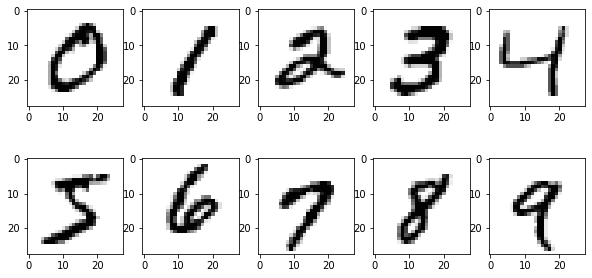

In [3]:
plt.figure(figsize=(10,5))

for digit in range(10):
    # Get relevant subplot
    _ = plt.subplot(2, 5, digit+1)
    
    first_digit_idx = np.argmax(y_train_orig==digit)
    plt.imshow(x_train_orig[first_digit_idx], cmap=plt.get_cmap('gray_r'))
plt.show()

### Divide the dataset using 1/7 split

In [4]:
from sklearn.model_selection import train_test_split 

x_train_reshaped.shape, x_test_reshaped.shape

((60000, 784), (10000, 784))

Data is already split with test being 1/7 of the data, I did not re-split it.

In [5]:
x_train = x_train_reshaped
x_test = x_test_reshaped
y_train = y_train_orig
y_test = y_test_orig

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1

**Prior**

In our case, this is dicussing the probability of being a digit (overall), per digit j.
In order to estimate it, I would sum the total labels of j and divide it by the total number of samples:

$$
\begin{align}
\text{Prior} && \pi_j = \Pr(y=j) = \dfrac{N_{class=j}}{N_{samples}} \\
\end{align}
$$


**Likelihood**

The probability for specific data point (with set of features) given specific class.

For example, in our case let's say we have a data point of picture with number 5, we can check what is the probability of been this data point if it's given that the class is 6.




**Resulting posterior prob**

The decision rule should be the class which maximzes the postrior $$P(y|x_{i}) = \frac{P_{j}(x_{i})\pi_j}{P(x_{i})} $$

And Since the denominator is constant that does not depend on $y_{i} $, we can just maximze the numerator

$$\hat{y_{i}} = argmax_{j}\;P_{j}(x_{i})\pi_j $$


Edge cases which may effect the classifier are images for digits which resemble other digits and thus similar liklihood (and higher compared to other 8 labels) nuder both labels. e.g 4/9, or 3/8.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2

In [6]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [7]:
# Data preprocessing
bnb = BernoulliNB(binarize=0.0)

In [8]:
_ = bnb.fit(x_train, y_train)

In [9]:
preds_train = bnb.predict(x_train)
preds_test = bnb.predict(x_test)

#### 1. Plot the mean image of each class and generate one sample per class

In [10]:
bnb.feature_log_prob_.shape

(10, 784)

###### 1.1. Mean image per class

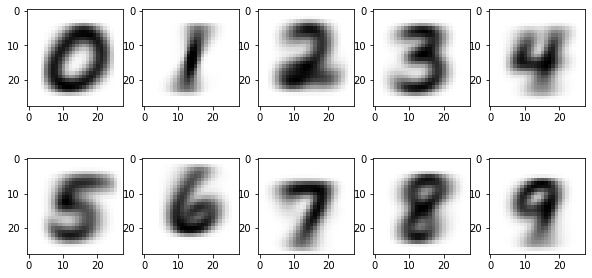

In [11]:
plt.figure(figsize=(10,5))

for digit in range(10):
    # Get relevant subplot for the current digit
    _ = plt.subplot(2, 5, digit+1) 
    
    # Get the log of the probabillities per pixel for a given class
    digit_pixel_log_probas = bnb.feature_log_prob_[digit]
    # Evaluate the actual probability out of the log(probability)
    digit_pixel_probas = np.exp(digit_pixel_log_probas)
    # Get the color based on the raw probability value
    mean_digit_pixels = (digit_pixel_probas).reshape((28, 28))
    # Plotting the current digit
    plt.imshow(mean_digit_pixels, cmap=plt.get_cmap('gray_r'))

plt.show()

###### 1.2. Generated sample per class

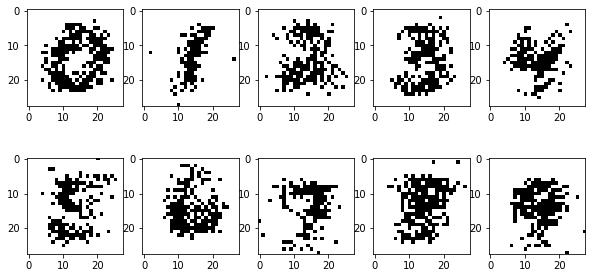

In [12]:
# Function to generate images from predicted probabilities
def generate_sample(feature_log_prob):
    shape_n = feature_log_prob.shape[0]
    # Sample uniform random number between 0-1 per pixel for the generated sample
    random_nums = np.round(np.random.rand(784), 2)
    pixels = np.zeros(shape_n)
    
    # Per random pixel value if the random value is smaller than the proba -> set pixel to black
    for i in range(shape_n):
        if random_nums[i] <= np.exp(feature_log_prob[i]):
            pixels[i] = 1
    return pixels


# Generating and plotting the generated samples
plt.figure(figsize=(10,5))

for digit in range(10):
    # Get relevant subplot for the current digit
    _ = plt.subplot(2, 5, digit+1) 
    
    # Get the log of the probabillities per pixel for a given class
    digit_pixel_log_probas = bnb.feature_log_prob_[digit]
    # Generate sample based on the log probabilities
    generated_pixels = generate_sample(digit_pixel_log_probas).reshape((28,28))
    # Plotting the current generated digit
    plt.imshow(generated_pixels, cmap=plt.get_cmap('gray_r'))
    
plt.show()

##### 2. Plotting the confusion matrix of the classifier & small analysis

In [13]:
conf_matrix = confusion_matrix(y_true=y_test,
                               y_pred=preds_test)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=[f'predicted_{i}' for i in range(0,10)])
conf_matrix_df

,predicted_0,predicted_1,predicted_2,predicted_3,predicted_4,predicted_5,predicted_6,predicted_7,predicted_8,predicted_9
0,887,0,4,7,2,41,16,1,22,0
1,0,1085,10,5,0,9,6,0,19,1
2,19,8,852,29,17,4,32,14,55,2
3,5,15,34,844,0,13,9,15,49,26
4,2,6,4,0,795,4,21,1,23,126
5,23,12,7,129,30,627,16,8,21,19
6,18,18,15,2,13,35,851,0,6,0
7,1,24,14,4,15,0,0,871,27,72
8,16,23,13,76,17,22,7,6,758,36
9,9,13,5,9,74,8,0,24,24,843


In [14]:
true_preds_count = np.trace(conf_matrix)
accuracy = true_preds_count / x_test.shape[0]
print(f"Model Accuracy: {round(accuracy * 100, 2)}%")

Model Accuracy: 84.13%


In [15]:
high_error_threshold = 50

for digit in range(10):
    
    
    # Get the row of current digit
    digit_hits = conf_matrix_df.iloc[digit]
    
    # Filter predictions with high error rate based on thershold
    high_preds_count = digit_hits[digit_hits > high_error_threshold]
    # Drop the correctly predicted samples (as they have high hit rates of course)
    high_preds_count.drop(labels=f'predicted_{digit}', inplace=True)
    
    # Print the mistakes that passed the threshold
    if len(high_preds_count) > 0:
        print(f"High errors for digit {digit}:\n{str(high_preds_count)}\n")


High errors for digit 2:
predicted_8    55
Name: 2, dtype: int64

High errors for digit 4:
predicted_9    126
Name: 4, dtype: int64

High errors for digit 5:
predicted_3    129
Name: 5, dtype: int64

High errors for digit 7:
predicted_9    72
Name: 7, dtype: int64

High errors for digit 8:
predicted_3    76
Name: 8, dtype: int64

High errors for digit 9:
predicted_4    74
Name: 9, dtype: int64



##### Summarized results in my words:

As we see above the model accuracy is 84.13% (not very bad for our naive assumption), in addition looking on high error rates we had (setting the threshold of at least 50 samples classified wrongly as we see in the boolean indexing above) we can see that we had we had some higher error rates in the next cases:

1. Classifiying 2 as 8 (55 times) - This can be expected given the similar shapes of the digits.
2. Classifiying 4 as 9 (126 times!) - This can be expected given the similar shapes of the digits.
3. Classifiying 5 as 3 (129 times!) - This can be expected given the similar shapes of the digits in their lower part.
4. Classifiying 7 as 9 (72 times) - This can be expected given the similar shapes of the digits in the right part.
5. Classifiying 8 as 3 (76 times) - This can be expected given the similar shapes of the digits in the right part.
6. Classifiying 9 as 4 (74 times) - This can be expected given the similar shapes.

Looking on the above errors, I'd say that the biggest "problems" in the model are:
- The miss-classification of 3-8 (125 mistakes)
- The miss-classification of 4-9 (200 mistakes) 
- The miss-classification of 3-5 (142 times)

If I had to do another iteration and improve the model, I would have looked on the specific samples with the higher error rates per problem, trying to understand if there is any similarity between them and a specific phenomena that is not represented in the train set / any phenomena that is causing a bias in the train set like missing samples of a specific digit drawing type.

Additionally, I would have tried to give a name to such phenomena and try to handle it by providing additional labels / samples / features could have helped the model defrentiating the samples.

##### 3. Optimal threshold of the binarization part - ideas

I think that what I would have done in order to optimize the binarization threshold is:
1. Split the dataset to: train / validation / test sets (train - 70%, validation - 10%, test - 20%)
2. Try to optimize the threshold of the binarization by using the train and validation set and evaluating the best X models I trained on the test set to evaluate the "real" production expected performance:
- Training models with different thresholds starting from 1 to 256
- Evaluating the performance on the train and validation sets for the different thresholds, plotting a graph that presents the error rate (based on accuracy / f1 / precision / recall - depends on the problem and what's more important to us to solve) and look for the top X thresholds where we have optimal performance on the train + validation.
- Evaluating the performance of the top X models on the test set and trying to evaluate which model had the best performance and makes more sense.


**Additional idea** - Use a similar idea to the above split but instead use stratified cross validation here with 10 folds, this will also help us understanding the stabillity of the different thresholds per model.

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

#### Loading the dataset

In [16]:
from sklearn.datasets import fetch_20newsgroups

ds_dict_train = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [17]:
ds_dict_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [18]:
data_train = ds_dict_train.get('data')
labels_train = ds_dict_train.get('target')
classes_train = ds_dict_train.get('target_names')

#### Creating words vectorizer and apply on the datasets

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cvectorizer = CountVectorizer(stop_words='english').fit(data_train)
print(len(cvectorizer.vocabulary_))

101322


In [21]:
data_train_vectorized = cvectorizer.transform(data_train)

print('Sparse matrix shape:', data_train_vectorized.shape)
print('Number of non-zeros:', data_train_vectorized.nnz)
print('Sparsity: %.2f%%' % (100.0 * data_train_vectorized.nnz / (data_train_vectorized.shape[0] * data_train_vectorized.shape[1])))

Sparse matrix shape: (11314, 101322)
Number of non-zeros: 755809
Sparsity: 0.07%


In [22]:
# Print a sample from the data
sample_idx=8
print(f"Sample -\n{data_train[sample_idx]}\n\n")
print(f"Vectorized sample -\n{data_train_vectorized[sample_idx]}")

Sample -
I have win 3.0 and downloaded several icons and BMP's but I can't figure out
how to change the "wallpaper" or use the icons.  Any help would be appreciated.


Thanx,

-Brando


Vectorized sample -
  (0, 19162)	1
  (0, 23319)	1
  (0, 23947)	1
  (0, 26651)	1
  (0, 34856)	1
  (0, 40177)	1
  (0, 46158)	1
  (0, 48451)	2
  (0, 88284)	1
  (0, 92600)	1
  (0, 95442)	1
  (0, 96428)	1


In [24]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=1.0):
        self.alpha = alpha
    
    def fit(self, X, y):
        
        self.X = X
        self.y = y
        
        # calculate priors and likelihoods
        classes, counts = np.unique(self.y, return_counts=True)
        prior = np.zeros(len(classes),)
        features_probs = np.zeros((len(classes), self.X.shape[1]))
        samples_count = len(self.y)

        for c in classes:
            # Evaluate the prior per class
            prior[c] = counts[c] / samples_count
            # Evaluate the smoothed feature conditional proba
            features_probs[c] = (self.X[self.y==c].sum(axis=0) + self.alpha)/(self.X[self.y==c].sum() + self.alpha * self.X.shape[1])

        self.prior = prior
        self.likelihood = features_probs

        return self

    def predict_log_proba(self, x):
        
        self.X_test = x
        
        # posterior
        self.log_probs = (self.X_test @ np.log(self.likelihood.T)) + np.log(self.prior.T)
        
        return self.log_probs

    def predict(self, X):
        
        self.X = X
        
        # argmax for prediction
        self.y_pred = np.argmax(self.predict_log_proba(self.X), axis=1)
        
        return self.y_pred

##### Loading test data

In [28]:
ds_dict_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
data_test = ds_dict_train.get('data')
labels_test = ds_dict_train.get('target')
classes_test = ds_dict_train.get('target_names')

In [29]:
data_test_vectorized = cvectorizer.transform(data_test)

print('Sparse matrix shape:', data_test_vectorized.shape)
print('Number of non-zeros:', data_test_vectorized.nnz)
print('Sparsity: %.2f%%' % (100.0 * data_test_vectorized.nnz / (data_test_vectorized.shape[0] * data_test_vectorized.shape[1])))

Sparse matrix shape: (11314, 101322)
Number of non-zeros: 755809
Sparsity: 0.07%


##### Use make_pipeline for the CountVectorizer + NaiveBayes classifier

In [30]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('countVectorizer', CountVectorizer(stop_words='english')), ('nb', NaiveBayes())])

In [31]:
# Test the fit method
pipe.fit(data_train, labels_train)

Pipeline(steps=[('countVectorizer', CountVectorizer(stop_words='english')),
                ('nb', NaiveBayes())])

In [32]:
# Test the predict method
pipe.predict(data_test)

array([7, 4, 4, ..., 3, 1, 8])

##### Evaluate my implementation test set results

In [33]:
test_preds_mine = pipe.predict(data_test)

In [36]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_pred=test_preds_mine, y_true=labels_test))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       480
           1       0.73      0.84      0.78       584
           2       1.00      0.05      0.10       591
           3       0.68      0.88      0.77       590
           4       0.94      0.85      0.89       578
           5       0.67      0.94      0.78       593
           6       0.92      0.84      0.88       585
           7       0.94      0.83      0.88       594
           8       0.96      0.82      0.89       598
           9       0.98      0.86      0.91       597
          10       0.63      0.93      0.75       600
          11       0.75      0.91      0.82       595
          12       0.92      0.80      0.86       591
          13       0.93      0.92      0.93       594
          14       0.93      0.89      0.91       593
          15       0.68      0.96      0.80       599
          16       0.87      0.90      0.88       546
          17       0.81    

##### Compare sklearn test set results

In [37]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB().fit(data_train_vectorized, labels_train)

In [38]:
test_preds_mnb = mnb.predict(data_test_vectorized)

In [39]:
print(classification_report(y_pred=test_preds_mnb, y_true=labels_test))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       480
           1       0.73      0.84      0.78       584
           2       1.00      0.05      0.10       591
           3       0.68      0.88      0.77       590
           4       0.94      0.85      0.89       578
           5       0.67      0.94      0.78       593
           6       0.92      0.84      0.88       585
           7       0.94      0.83      0.88       594
           8       0.96      0.82      0.89       598
           9       0.98      0.86      0.91       597
          10       0.63      0.93      0.75       600
          11       0.75      0.91      0.82       595
          12       0.92      0.80      0.86       591
          13       0.93      0.92      0.93       594
          14       0.93      0.89      0.91       593
          15       0.68      0.96      0.80       599
          16       0.87      0.90      0.88       546
          17       0.81    

In [40]:
accuracy = accuracy_score(y_pred=test_preds_mnb, y_true=labels_test)
my_accuracy = accuracy_score(y_pred=test_preds_mine, y_true=labels_test)
print(f"MultinomialNB (sklearn) accuracy: {round(accuracy*100,2)}%")
print(f"MultinomialNB (my implementation) accuracy: {round(my_accuracy*100,2)}%")

MultinomialNB (sklearn) accuracy: 81.77%
MultinomialNB (my implementation) accuracy: 81.77%


We got the same performance!

##### Plot the learning curve

In [41]:
from sklearn.model_selection import learning_curve

estimator = MultinomialNB()

train_sizes, train_scores, test_scores = learning_curve(estimator=estimator,
                                                        X=data_train_vectorized,
                                                        y=labels_train,
                                                        train_sizes=[i*0.1 for i in range(1,11)])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

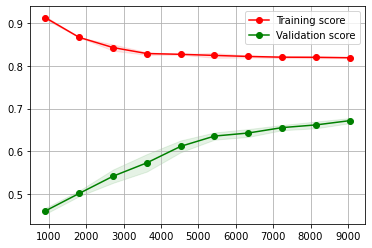

In [42]:
# Plot learning curve
axes = plt.gca()
axes.grid()
axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
)
axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Validation score"
)
axes.legend(loc="best");

##### Optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.)

In [52]:
import itertools

# Setting optional params we will try
max_features = [
                500, 
                2000, 
                10000, 
                None  # default
                ]
min_df = [
          0.3,
          0.4,
          0.5,
          1,  # default
          2,
          3,
          5,
          10
         ]
max_df = [0.3,
          0.4,
          0.5,
          1.0, # default
          2,
          3,
          5,
          10,
          20,
          50,          
         ] 


# Saving the performance and params results here
results = []

# Creating all the optional combinations of params
params = list(itertools.product(max_features, min_df, max_df))
params = [(mf, mind, maxd) for (mf, mind, maxd) in params if mind <= maxd]


for mf, mind, maxd in params:
    print("Fitting on params -", mf, mind, maxd)
    
    cv = CountVectorizer(stop_words='english', max_features=mf, min_df=mind, max_df=maxd)

    try:
        optcvectorizer = cv.fit(data_train)
        train_vectorized_ds = optcvectorizer.transform(data_train)
        test_vectorized_ds = optcvectorizer.transform(data_test)
        
        mnb = MultinomialNB().fit(train_vectorized_ds, labels_train)
        test_preds = mnb.predict(test_vectorized_ds)
        accuracy = accuracy_score(y_pred=test_preds, y_true=labels_test)
        results.append((mf, mind, maxd, accuracy))
    except Exception as e:
        # In case a parameters combination is invalid print it and continue
        print("Exception - " + str(e))
        print("Params - ", mf, mind, maxd)


Fitting on params - 500 0.3 0.3
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  500 0.3 0.3
Fitting on params - 500 0.3 0.4
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  500 0.3 0.4
Fitting on params - 500 0.3 0.5
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  500 0.3 0.5
Fitting on params - 500 0.3 1.0
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  500 0.3 1.0
Fitting on params - 500 0.3 2
Exception - max_df corresponds to < documents than min_df
Params -  500 0.3 2
Fitting on params - 500 0.3 3
Exception - max_df corresponds to < documents than min_df
Params -  500 0.3 3
Fitting on params - 500 0.3 4
Exception - max_df corresponds to < documents than min_df
Params -  500 0.3 4
Fitting on params - 500 0.3 5
Exception - max_df corresponds to < documents than min_df
Params -  500 0.3 5
Fitting on params - 

Fitting on params - 2000 2 4
Fitting on params - 2000 2 5
Fitting on params - 2000 2 10
Fitting on params - 2000 2 20
Fitting on params - 2000 2 50
Fitting on params - 2000 3 3
Fitting on params - 2000 3 4
Fitting on params - 2000 3 5
Fitting on params - 2000 3 10
Fitting on params - 2000 3 20
Fitting on params - 2000 3 50
Fitting on params - 2000 5 5
Fitting on params - 2000 5 10
Fitting on params - 2000 5 20
Fitting on params - 2000 5 50
Fitting on params - 2000 10 10
Fitting on params - 2000 10 20
Fitting on params - 2000 10 50
Fitting on params - 10000 0.3 0.3
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  10000 0.3 0.3
Fitting on params - 10000 0.3 0.4
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  10000 0.3 0.4
Fitting on params - 10000 0.3 0.5
Exception - After pruning, no terms remain. Try a lower min_df or a higher max_df.
Params -  10000 0.3 0.5
Fitting on params - 10000 0.3 1.0
Except

Exception - max_df corresponds to < documents than min_df
Params -  None 0.5 5
Fitting on params - None 0.5 10
Exception - max_df corresponds to < documents than min_df
Params -  None 0.5 10
Fitting on params - None 0.5 20
Exception - max_df corresponds to < documents than min_df
Params -  None 0.5 20
Fitting on params - None 0.5 50
Exception - max_df corresponds to < documents than min_df
Params -  None 0.5 50
Fitting on params - None 1 1.0
Fitting on params - None 1 2
Fitting on params - None 1 3
Fitting on params - None 1 4
Fitting on params - None 1 5
Fitting on params - None 1 10
Fitting on params - None 1 20
Fitting on params - None 1 50
Fitting on params - None 2 2
Fitting on params - None 2 3
Fitting on params - None 2 4
Fitting on params - None 2 5
Fitting on params - None 2 10
Fitting on params - None 2 20
Fitting on params - None 2 50
Fitting on params - None 3 3
Fitting on params - None 3 4
Fitting on params - None 3 5
Fitting on params - None 3 10
Fitting on params - None 

In [54]:
res_df = pd.DataFrame(results, columns=['max_features', 'min_df', 'max_df', 'accuracy'])
res_df.sort_values('accuracy', ascending=False).head(10)

,max_features,min_df,max_df,accuracy
91,NaN,1,50.0,0.862206
90,NaN,1,20.0,0.851335
89,NaN,1,10.0,0.845236
98,NaN,2,50.0,0.835867
104,NaN,3,50.0,0.818101
84,NaN,1,1.0,0.817748
88,NaN,1,5.0,0.810235
97,NaN,2,20.0,0.806435
87,NaN,1,4.0,0.794237
108,NaN,5,50.0,0.793000


It seems that the main param that has impact here is the max_df for high values (seems like it's cleaning noise).

Let's try to optimize it with some additional values:

In [60]:
results2 = []

for maxdf in range(0,101, 10):
    print("Fitting with max_df:", maxdf)
    
    cv = CountVectorizer(stop_words='english', max_df=maxdf)

    try:
        optcvectorizer = cv.fit(data_train)
        train_vectorized_ds = optcvectorizer.transform(data_train)
        test_vectorized_ds = optcvectorizer.transform(data_test)
        
        mnb = MultinomialNB().fit(train_vectorized_ds, labels_train)
        test_preds = mnb.predict(test_vectorized_ds)
        accuracy = accuracy_score(y_pred=test_preds, y_true=labels_test)
        results2.append((maxdf, accuracy))
    except Exception as e:
        # In case a parameters combination is invalid print it and continue
        print("Exception - " + str(e))
        print("Params - ", maxdf)


Fitting with max_df: 0
Exception - max_df corresponds to < documents than min_df
Params -  0
Fitting with max_df: 10
Fitting with max_df: 20
Fitting with max_df: 30
Fitting with max_df: 40
Fitting with max_df: 50
Fitting with max_df: 60
Fitting with max_df: 70
Fitting with max_df: 80
Fitting with max_df: 90
Fitting with max_df: 100


In [61]:
res_df2 = pd.DataFrame(results2, columns=['max_df', 'accuracy'])
res_df2.sort_values('accuracy', ascending=False).head(10)

,max_df,accuracy
4,50,0.862206
3,40,0.860262
5,60,0.859024
6,70,0.857168
7,80,0.856373
9,100,0.856284
2,30,0.856196
8,90,0.856196
1,20,0.851335
0,10,0.845236


Seems like the best value is somewhere between 40-60, I would stick with 50 in order to avoid overfitting to a specific value based on our set.

Previous accuracy was 81.77% with the default params, let's check the new test performance with the optimized params:

- max_df = 50

In [62]:
cv2 = CountVectorizer(stop_words='english', max_df=50)
cv2.fit(data_train)
train_ds_opt = cv2.transform(data_train)
test_ds_opt = cv2.transform(data_test)

mnb2 = MultinomialNB().fit(train_ds_opt, labels_train)
test_preds_opt = mnb2.predict(test_ds_opt)
accuracy = accuracy_score(y_pred=test_preds_opt, y_true=labels_test)
print(classification_report(y_pred=test_preds_opt, y_true=labels_test))
print("\nAccuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       480
           1       0.84      0.87      0.86       584
           2       0.97      0.31      0.47       591
           3       0.78      0.87      0.82       590
           4       0.92      0.88      0.90       578
           5       0.82      0.93      0.87       593
           6       0.90      0.88      0.89       585
           7       0.94      0.87      0.90       594
           8       0.94      0.90      0.92       598
           9       0.96      0.89      0.92       597
          10       0.54      0.95      0.69       600
          11       0.89      0.91      0.90       595
          12       0.92      0.88      0.90       591
          13       0.90      0.94      0.92       594
          14       0.90      0.91      0.91       593
          15       0.85      0.95      0.90       599
          16       0.92      0.90      0.91       546
          17       0.87    

We improved from 81.77% accuracy to 86.22% accuracy!

##### Optional: Model interpretability

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

Did not have time to get to it

### Thank you!